In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
train_df = pd.read_csv("Training Data.csv")

In [ ]:
train_df.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [ ]:
train_df.shape

(252000, 13)

In [ ]:
train_df['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [ ]:
train_df['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [ ]:
train_df['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [ ]:
train_df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [ ]:
train_df['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [ ]:
train_df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [ ]:
train_df['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [ ]:
train_df['CURRENT_HOUSE_YRS'].value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64

In [ ]:
train_df['CURRENT_JOB_YRS'].value_counts()

3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: CURRENT_JOB_YRS, dtype: int64

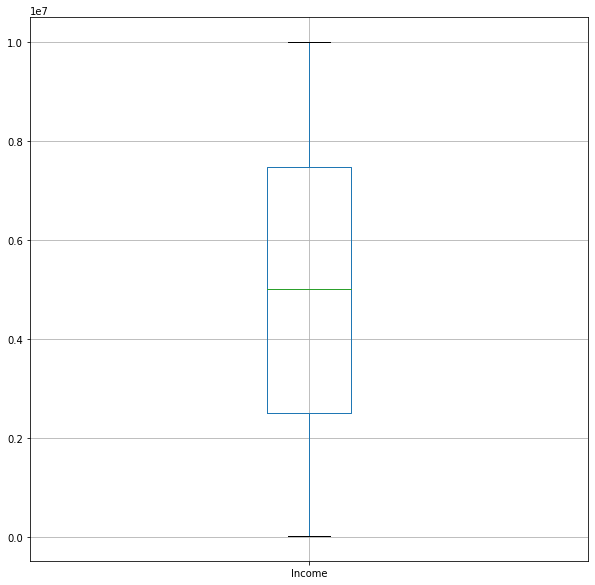

In [ ]:
columns=['Income']
train_df.boxplot(column=columns  , figsize=(10,10))

In [ ]:
train_df['low_experience'] = np.where((train_df['CURRENT_JOB_YRS'] >= 1) & (train_df['CURRENT_JOB_YRS'] <= 5) , 1, 0)
train_df['med_experience'] = np.where((train_df['CURRENT_JOB_YRS'] >= 6) & (train_df['CURRENT_JOB_YRS'] <= 10) , 1, 0)
train_df['high_experience'] = np.where((train_df['CURRENT_JOB_YRS'] >= 11) & (train_df['CURRENT_JOB_YRS'] <= 14) , 1, 0)


In [ ]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,low_experience,med_experience,high_experience
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0,1,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,1,0,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,0,0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0,0


In [ ]:
relation_state = train_df[['Married/Single']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
rela_st = cat_encoder.fit_transform(relation_state)
rela_st

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['married', 'single'], dtype=object)]

In [ ]:
state_coded = pd.DataFrame(rela_st , columns=['married', 'single'])
train_df=pd.concat([train_df,state_coded] , axis=1)

In [ ]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,low_experience,med_experience,high_experience,married,single
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0,0.0,1.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0,1,0,0.0,1.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,1,0,0,1.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,0,0,0.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0,0,0.0,1.0


In [ ]:
car_owner = { 'yes' : 1 , 'no' : 0 }
train_df['Car_Ownership'] = train_df['Car_Ownership'].replace(car_owner)

In [ ]:
house_owner = train_df[['House_Ownership']]
cat_encoder = OneHotEncoder(sparse=False)
h_o_cat = cat_encoder.fit_transform(house_owner)
h_o_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['norent_noown', 'owned', 'rented'], dtype=object)]

In [ ]:
ho_hot_encoded = pd.DataFrame(h_o_cat , columns=['norent_noown', 'owned', 'rented'])
train_df = pd.concat([train_df , ho_hot_encoded] , axis=1)

In [ ]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,low_experience,med_experience,high_experience,married,single,norent_noown,owned,rented
0,1,1303834,23,3,single,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0,0.0,1.0,0.0,0.0,1.0
1,2,7574516,40,10,single,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0,1,0,0.0,1.0,0.0,0.0,1.0
2,3,3991815,66,4,married,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0,1,0,0,1.0,0.0,0.0,0.0,1.0
3,4,6256451,41,2,single,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,0,0,0.0,1.0,0.0,0.0,1.0
4,5,5768871,47,11,single,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0,0,0.0,1.0,0.0,0.0,1.0


In [ ]:
relation_state = train_df[['Profession']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
rela_st = cat_encoder.fit_transform(relation_state)


In [ ]:
m = cat_encoder.categories_


In [ ]:
print(m)

[array(['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer',
       'Artist', 'Aviator', 'Biomedical_Engineer', 'Chartered_Accountant',
       'Chef', 'Chemical_engineer', 'Civil_engineer', 'Civil_servant',
       'Comedian', 'Computer_hardware_engineer', 'Computer_operator',
       'Consultant', 'Dentist', 'Design_Engineer', 'Designer', 'Drafter',
       'Economist', 'Engineer', 'Fashion_Designer', 'Financial_Analyst',
       'Firefighter', 'Flight_attendant', 'Geologist', 'Graphic_Designer',
       'Hotel_Manager', 'Industrial_Engineer', 'Lawyer', 'Librarian',
       'Magistrate', 'Mechanical_engineer', 'Microbiologist', 'Official',
       'Petroleum_Engineer', 'Physician', 'Police_officer', 'Politician',
       'Psychologist', 'Scientist', 'Secretary', 'Software_Developer',
       'Statistician', 'Surgeon', 'Surveyor', 'Technical_writer',
       'Technician', 'Technology_specialist', 'Web_designer'],
      dtype=object)]


In [ ]:
state_coded = pd.DataFrame(rela_st , columns=['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer',
       'Artist', 'Aviator', 'Biomedical_Engineer', 'Chartered_Accountant',
       'Chef', 'Chemical_engineer', 'Civil_engineer', 'Civil_servant',
       'Comedian', 'Computer_hardware_engineer', 'Computer_operator',
       'Consultant', 'Dentist', 'Design_Engineer', 'Designer', 'Drafter',
       'Economist', 'Engineer', 'Fashion_Designer', 'Financial_Analyst',
       'Firefighter', 'Flight_attendant', 'Geologist', 'Graphic_Designer',
       'Hotel_Manager', 'Industrial_Engineer', 'Lawyer', 'Librarian',
       'Magistrate', 'Mechanical_engineer', 'Microbiologist', 'Official',
       'Petroleum_Engineer', 'Physician', 'Police_officer', 'Politician',
       'Psychologist', 'Scientist', 'Secretary', 'Software_Developer',
       'Statistician', 'Surgeon', 'Surveyor', 'Technical_writer',
       'Technician', 'Technology_specialist', 'Web_designer'])
train_df=pd.concat([train_df,state_coded] , axis=1)

In [ ]:
columns_to_be_deleted = ['Id','Married/Single' , 'House_Ownership' , 'Profession' ,  'CITY' , 'STATE' ]
for i in columns_to_be_deleted:
  train_df.drop( i , axis=1 , inplace=True)

In [ ]:
oversample = SMOTE()


In [ ]:
train_df.head()

,Income,Age,Experience,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,low_experience,med_experience,high_experience,married,single,norent_noown,owned,rented,Air_traffic_controller,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
0,1303834,23,3,0,3,13,0,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7574516,40,10,0,9,13,0,0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3991815,66,4,0,4,10,0,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6256451,41,2,1,2,12,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5768871,47,11,0,3,14,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.columns

Index(['Income', 'Age', 'Experience', 'Car_Ownership', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'low_experience', 'med_experience',
       'high_experience', 'married', 'single', 'norent_noown', 'owned',
       'rented', 'Air_traffic_controller', 'Analyst', 'Architect',
       'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer',
       'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer',
       'Civil_servant', 'Comedian', 'Computer_hardware_engineer',
       'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer',
       'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer',
       'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist',
       'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer',
       'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist',
       'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer',
       'Politician', 'Psychologist', 'Scientist', 'S

In [ ]:
test_df = pd.read_csv("Test Data.csv")

In [ ]:
test_df['low_experience'] = np.where((test_df['CURRENT_JOB_YRS'] >= 1) & (test_df['CURRENT_JOB_YRS'] <= 5) , 1, 0)
test_df['med_experience'] = np.where((test_df['CURRENT_JOB_YRS'] >= 6) & (test_df['CURRENT_JOB_YRS'] <= 10) , 1, 0)
test_df['high_experience'] = np.where((test_df['CURRENT_JOB_YRS'] >= 11) & (test_df['CURRENT_JOB_YRS'] <= 14) , 1, 0)


In [ ]:
relation_state = test_df[['Married/Single']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
rela_st = cat_encoder.fit_transform(relation_state)

state_coded = pd.DataFrame(rela_st , columns=['married', 'single'])
test_df=pd.concat([test_df,state_coded] , axis=1)

In [ ]:
car_owner = { 'yes' : 1 , 'no' : 0 }
test_df['Car_Ownership'] = test_df['Car_Ownership'].replace(car_owner)

In [ ]:
house_owner = test_df[['House_Ownership']]
cat_encoder = OneHotEncoder(sparse=False)
h_o_cat = cat_encoder.fit_transform(house_owner)

ho_hot_encoded = pd.DataFrame(h_o_cat , columns=['norent_noown', 'owned', 'rented'])
test_df = pd.concat([test_df , ho_hot_encoded] , axis=1)

In [ ]:
relation_state = test_df[['Profession']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
rela_st = cat_encoder.fit_transform(relation_state)


In [ ]:
cat_encoder.categories_

[array(['Air traffic controller', 'Analyst', 'Architect', 'Army officer',
        'Artist', 'Aviator', 'Biomedical Engineer', 'Chartered Accountant',
        'Chef', 'Chemical engineer', 'Civil engineer', 'Civil servant',
        'Comedian', 'Computer hardware engineer', 'Computer operator',
        'Consultant', 'Dentist', 'Design Engineer', 'Designer', 'Drafter',
        'Economist', 'Engineer', 'Fashion Designer', 'Financial Analyst',
        'Firefighter', 'Flight attendant', 'Geologist', 'Graphic Designer',
        'Hotel Manager', 'Industrial Engineer', 'Lawyer', 'Librarian',
        'Magistrate', 'Mechanical engineer', 'Microbiologist', 'Official',
        'Petroleum Engineer', 'Physician', 'Police officer', 'Politician',
        'Psychologist', 'Scientist', 'Secretary', 'Software Developer',
        'Statistician', 'Surgeon', 'Surveyor', 'Technical writer',
        'Technician', 'Technology specialist', 'Web designer'],
       dtype=object)]

In [ ]:
state_coded = pd.DataFrame(rela_st , columns=['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer',
        'Artist', 'Aviator', 'Biomedical_Engineer', 'Chartered_Accountant',
        'Chef', 'Chemical_engineer', 'Civil_engineer', 'Civil_servant',
        'Comedian', 'Computer_hardware_engineer', 'Computer_operator',
        'Consultant', 'Dentist', 'Design_Engineer', 'Designer', 'Drafter',
        'Economist', 'Engineer', 'Fashion_Designer', 'Financial_Analyst',
        'Firefighter', 'Flight_attendant', 'Geologist', 'Graphic_Designer',
        'Hotel_Manager', 'Industrial_Engineer', 'Lawyer', 'Librarian',
        'Magistrate', 'Mechanical_engineer', 'Microbiologist', 'Official',
        'Petroleum_Engineer', 'Physician', 'Police_officer', 'Politician',
        'Psychologist', 'Scientist', 'Secretary', 'Software_Developer',
        'Statistician', 'Surgeon', 'Surveyor', 'Technical_writer',
        'Technician', 'Technology_specialist', 'Web_designer'])
test_df=pd.concat([test_df,state_coded] , axis=1)

In [ ]:
columns_to_be_deleted = ['ID','Married/Single' , 'House_Ownership' , 'Profession' , 'CITY' , 'STATE' ]
for i in columns_to_be_deleted:
  test_df.drop( i , axis=1 , inplace=True)

In [ ]:
test_df.head()

,Income,Age,Experience,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,low_experience,med_experience,high_experience,married,single,norent_noown,owned,rented,Air_traffic_controller,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
0,7393090,59,19,0,4,13,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1215004,25,5,0,5,10,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8901342,50,12,0,9,14,0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1944421,49,9,1,3,12,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13429,25,18,1,13,11,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
real_pred = pd.read_csv("Sample Prediction Dataset.csv")
real_pred.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:
scoring_reg={'mean_absolute_error':mean_absolute_error,
         'mean_squared_log_error':mean_squared_log_error
        ,'mean_squared_error':mean_squared_error
        ,'median_absolute_error':median_absolute_error
        ,'r2_score':r2_score}

In [ ]:
scoring_class = {'accuracy_score':accuracy_score,
                 'f1_score':f1_score,
                 #'cross_val_score':cross_val_score,
                 'confusion_matrix':confusion_matrix,
                 'classification_report':classification_report}

In [ ]:
X_train = train_df[[ 'Income', 'Age', 'Experience', 'Car_Ownership', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS',  'low_experience', 'med_experience',
       'high_experience', 'married', 'single', 'norent_noown', 'owned',
       'rented', 'Air_traffic_controller', 'Analyst', 'Architect',
       'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer',
       'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer',
       'Civil_servant', 'Comedian', 'Computer_hardware_engineer',
       'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer',
       'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer',
       'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist',
       'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer',
       'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist',
       'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer',
       'Politician', 'Psychologist', 'Scientist', 'Secretary',
       'Software_Developer', 'Statistician', 'Surgeon', 'Surveyor',
       'Technical_writer', 'Technician', 'Technology_specialist',
       'Web_designer']]

y_train = train_df['Risk_Flag']

X_test = test_df[['Income', 'Age', 'Experience', 'Car_Ownership', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'low_experience', 'med_experience',
       'high_experience', 'married', 'single', 'norent_noown', 'owned',
       'rented', 'Air_traffic_controller', 'Analyst', 'Architect',
       'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer',
       'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer',
       'Civil_servant', 'Comedian', 'Computer_hardware_engineer',
       'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer',
       'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer',
       'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist',
       'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer',
       'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist',
       'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer',
       'Politician', 'Psychologist', 'Scientist', 'Secretary',
       'Software_Developer', 'Statistician', 'Surgeon', 'Surveyor',
       'Technical_writer', 'Technician', 'Technology_specialist',
       'Web_designer']]

real_y = real_pred['risk_flag']

K NEAREST NEIGHBOUR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)

for name,score in scoring_class.items():
  print(name ,(score(real_y , knn.predict(X_test))))

accuracy_score 0.7790357142857143
f1_score 0.11928825622775802
confusion_matrix [[21394  3013]
 [ 3174   419]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.88      0.87     24407
           1       0.12      0.12      0.12      3593

    accuracy                           0.78     28000
   macro avg       0.50      0.50      0.50     28000
weighted avg       0.77      0.78      0.78     28000



my own code

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
sc_X = StandardScaler()
X_train1 = sc_X.fit_transform(X_train.iloc[0:500 , :])
X_test1 = sc_X.transform(X_test.iloc[0:200 , :])

In [ ]:

#X_train.shape

In [ ]:
#X_test.shape

In [ ]:
y_train1= y_train.to_numpy()

In [ ]:
y_predd = []

for i in range(len(X_test1)):
    


    eculidean_dis=[]
    index_ = []
    y_val=[]
    for j in range(len(X_train1)):
        s =   np.sqrt(abs(np.sum(((X_test1[i,:]) - (X_train1[j,:]))**2)))
        eculidean_dis.append(s)
        
    for x in range(11):
        m = min(eculidean_dis)
        y = eculidean_dis.index(m)
        index_.append(y)
        eculidean_dis[y]=9999
            
    for p in index_:
        y_val.append(y_train1[p])


    if y_val.count(1)>y_val.count(0):
        y_predd.append(1)

    else:
        y_predd.append(0)
        

In [ ]:
print(len(y_predd))

200


In [ ]:
for name,score in scoring_class.items():
  print(name ,(score(real_pred.iloc[0:200 , 1 ] , y_predd)))

accuracy_score 0.88
f1_score 0.0
confusion_matrix [[176   0]
 [ 24   0]]
classification_report               precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00        24

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini",
             min_samples_leaf=2 , max_depth=40 )

clf_gini.fit(X_train,y_train)

for name,score in scoring_class.items():
  print(name ,(score(real_y , clf_gini.predict(X_test))))

accuracy_score 0.7852142857142858
f1_score 0.11688693098384728
confusion_matrix [[21588  2819]
 [ 3195   398]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.88      0.88     24407
           1       0.12      0.11      0.12      3593

    accuracy                           0.79     28000
   macro avg       0.50      0.50      0.50     28000
weighted avg       0.78      0.79      0.78     28000



logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr.fit(X_train, y_train)

for name,score in scoring_class.items():
  print(name ,(score(real_y , logisticRegr.predict(X_test))))

accuracy_score 0.8716785714285714
f1_score 0.0
confusion_matrix [[24407     0]
 [ 3593     0]]
classification_report               precision    recall  f1-score   support

           0       0.87      1.00      0.93     24407
           1       0.00      0.00      0.00      3593

    accuracy                           0.87     28000
   macro avg       0.44      0.50      0.47     28000
weighted avg       0.76      0.87      0.81     28000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


my own code

In [ ]:
x1 = train_df['Income']
x1.to_numpy()

x2=train_df['Age']
x2.to_numpy()

x3=train_df['Experience']
x3.to_numpy()

x4=train_df['Car_Ownership']
x4.to_numpy()

x5=train_df['CURRENT_JOB_YRS']
x5.to_numpy()

x6=train_df['CURRENT_HOUSE_YRS']
x6.to_numpy()

x7=train_df['low_experience']
x7.to_numpy()

x8=train_df['med_experience']
x8.to_numpy()

x9=train_df['high_experience']
x9.to_numpy()

x10=train_df['married']
x10.to_numpy()

x11=train_df['single']
x11.to_numpy()

x12=train_df['norent_noown']
x12.to_numpy()

x13=train_df['owned']
x13.to_numpy()

x14=train_df['rented']
x14.to_numpy()



array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
h0 = 0
h1 = 0
h2 = 0
h3 = 0
h4 = 0
h5 = 0
h6 = 0
h7 = 0
h8 = 0
h9 = 0
h10 = 0
h11 = 0
h12 = 0
h13 = 0
h14 = 0

lr = 0.001
h0_lis=[]
h1_lis=[]
h2_lis=[]
h3_lis=[]

loss_funcc=[]
Epochs = []

for i in range (1000):
    
    Epochs.append(i)
    hx = 1 / (1 + np.exp((-1)*(h0 + h1*x1 + h2*x2 + h3*x3 + h4*x4 + h5*x5 + h6*x6 + h7*x7 + h8*x8 + h9*x9 + h10*x10 + h11*x11 + h12*x12 + h13*x13 + h14*x14) ))
    
    #cost_func = (1/(2*len(x1)))*sum((hx-y)**2)
    
    cost_func = (-1 / len(x1)) *(sum((y_train*np.log(hx))+((1-y_train)*(np.log(hx)))))
    
    loss_funcc.append(cost_func)
    
    
    g0 =  (1 / len(x1)) * np.sum(hx - y_train)
    g1 =  (1 / len(x1)) * np.sum((hx - y_train) * x1)
    g2 =  (1 / len(x2)) * np.sum((hx - y_train) * x2)
    g3 =  (1 / len(x3)) * np.sum((hx - y_train) * x3)
    g4 =  (1 / len(x4)) * np.sum((hx - y_train) * x4)
    g5 =  (1 / len(x5)) * np.sum((hx - y_train) * x5)
    g6 = (1 / len(x6)) * np.sum((hx - y_train) * x6)
    g7 = (1 / len(x7)) * np.sum((hx - y_train) * x7)
    g8 = (1 / len(x8)) * np.sum((hx - y_train) * x8)
    g9 = (1 / len(x9)) * np.sum((hx - y_train) * x9)
    g10 = (1 / len(x10)) * np.sum((hx - y_train) * x10)
    g11 = (1 / len(x11)) * np.sum((hx - y_train) * x11)
    g12 = (1 / len(x12)) * np.sum((hx - y_train) * x12)
    g13 = (1 / len(x13)) * np.sum((hx - y_train) * x13)
    g14 = (1 / len(x14)) * np.sum((hx - y_train) * x14)
                                
                                 
                                 
                                 
                                 
                                 
                                 
    
    
    h0 = h0-(lr*g0)
    h1 = h1 - (lr*g1)
    h2 = h2 - (lr*g2)
    h3 = h3 - (lr*g3)
    h4 = h4 - (lr*g4)
    h5 = h5 - (lr*g5)
    h6 = h6 - (lr*g6)
    h7 = h7 - (lr*g7)
    h8 = h8 - (lr*g8)
    h9 = h9 - (lr*g9)
    h10 = h10 - (lr*g10)
    h11 = h11 - (lr*g11)
    h12 = h12 - (lr*g12)
    h13 = h13 - (lr*g13)
    h14 = h14 - (lr*g14)



    
    h0_lis.append(h0)
    h1_lis.append(h1)
    h2_lis.append(h2)
    h3_lis.append(h3)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
x1 = test_df['Income']
x1.to_numpy()

x2=test_df['Age']
x2.to_numpy()

x3=test_df['Experience']
x3.to_numpy()

x4=test_df['Car_Ownership']
x4.to_numpy()

x5=test_df['CURRENT_JOB_YRS']
x5.to_numpy()

x6=test_df['CURRENT_HOUSE_YRS']
x6.to_numpy()

x7=test_df['low_experience']
x7.to_numpy()

x8=test_df['med_experience']
x8.to_numpy()

x9=test_df['high_experience']
x9.to_numpy()

x10=test_df['married']
x10.to_numpy()

x11=test_df['single']
x11.to_numpy()

x12=test_df['norent_noown']
x12.to_numpy()

x13=test_df['owned']
x13.to_numpy()

x14=test_df['rented']
x14.to_numpy()


array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
pre_y = hx = 1 / (1 + np.exp((-1)*(h0 + h1*x1 + h2*x2 + h3*x3 + h4*x4 + h5*x5 + h6*x6 + h7*x7 + h8*x8 + h9*x9 + h10*x10 + h11*x11 + h12*x12 + h13*x13 + h14*x14 ) ))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
pre_y.shape

(28000,)

In [ ]:
pre_y = pre_y.values.reshape(1,28000)
re_y = real_y.values.reshape(1,28000)

In [ ]:
predicted_classes = (pre_y >= 0.5).astype(int)


predicted_classes = predicted_classes.flatten()

accuracy = np.mean(predicted_classes == re_y.flatten())
print(accuracy)

0.8716785714285714


SVC

In [ ]:
from sklearn.svm import LinearSVC  
clf = LinearSVC()
clf.fit(X_train , y_train)

for name,score in scoring_class.items():
  print(name ,(score(real_y , clf.predict(X_test))))

accuracy_score 0.31689285714285714
f1_score 0.2190192315544486
confusion_matrix [[ 6191 18216]
 [  911  2682]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.25      0.39     24407
           1       0.13      0.75      0.22      3593

    accuracy                           0.32     28000
   macro avg       0.50      0.50      0.31     28000
weighted avg       0.78      0.32      0.37     28000



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


REGRESSION

In [ ]:
train_df.head()

,Income,Age,Experience,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,low_experience,med_experience,high_experience,married,single,norent_noown,owned,rented,Air_traffic_controller,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
0,1303834,23,3,0,3,13,0,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7574516,40,10,0,9,13,0,0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3991815,66,4,0,4,10,0,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6256451,41,2,1,2,12,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5768871,47,11,0,3,14,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = train_df[[ 'Age', 'Experience', 'Car_Ownership', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS',  'low_experience', 'med_experience',
       'high_experience', 'married', 'single', 'norent_noown', 'owned',
       'rented', 'Air_traffic_controller', 'Analyst', 'Architect',
       'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer',
       'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer',
       'Civil_servant', 'Comedian', 'Computer_hardware_engineer',
       'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer',
       'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer',
       'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist',
       'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer',
       'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist',
       'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer',
       'Politician', 'Psychologist', 'Scientist', 'Secretary',
       'Software_Developer', 'Statistician', 'Surgeon', 'Surveyor',
       'Technical_writer', 'Technician', 'Technology_specialist',
       'Web_designer' ]]

y_train = train_df['Income']

X_test = test_df[[  'Age', 'Experience', 'Car_Ownership', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS',  'low_experience', 'med_experience',
       'high_experience', 'married', 'single', 'norent_noown', 'owned',
       'rented', 'Air_traffic_controller', 'Analyst', 'Architect',
       'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer',
       'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer',
       'Civil_servant', 'Comedian', 'Computer_hardware_engineer',
       'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer',
       'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer',
       'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist',
       'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer',
       'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist',
       'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer',
       'Politician', 'Psychologist', 'Scientist', 'Secretary',
       'Software_Developer', 'Statistician', 'Surgeon', 'Surveyor',
       'Technical_writer', 'Technician', 'Technology_specialist',
       'Web_designer']]

y_test = test_df['Income']


X_train2= X_train.iloc[0:1000 ]

y_train2 = y_train.iloc[0:1000 ]

X_test2 = X_test.iloc[0:500 ]
y_test2 = y_test.iloc[0:500]

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)

for name,score in scoring_reg.items():
  print(name ,(score(y_test , regr.predict(X_test))))

mean_absolute_error 2476589.532964286
mean_squared_log_error 0.9975518512475954
mean_squared_error 8181778461216.35
median_absolute_error 2438778.0
r2_score 0.003142979203507479


In [ ]:
'''
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
poly_regs.fit_transform(X_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(poly_regs,y_train)

for name,score in scoring_reg.items():
  print(name ,(score(y_test , regr.predict(poly_regs.fit_transform(X_test)))))
  '''

'\nfrom sklearn.preprocessing import PolynomialFeatures  \npoly_regs= PolynomialFeatures(degree= 2)  \npoly_regs.fit_transform(X_train)  \nlin_reg_2 =LinearRegression()  \nlin_reg_2.fit(poly_regs,y_train)\n\nfor name,score in scoring_reg.items():\n  print(name ,(score(y_test , regr.predict(poly_regs.fit_transform(X_test)))))\n  '

In [ ]:
'''from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
degree=5
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X_train,y_train)'''

'from sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn import preprocessing\nscaler = preprocessing.StandardScaler()\ndegree=5\npolyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())\npolyreg_scaled.fit(X_train,y_train)'

In [ ]:
'''from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)


from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y_train)'''


"from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc_y = StandardScaler()\nX = sc_X.fit_transform(X_train)\n\n\nfrom sklearn.svm import SVR\nregressor = SVR(kernel='rbf')\nregressor.fit(X,y_train)"

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

print(score(y_test ,polyreg.predict(X_test) ))

In [ ]:
df = pd.read_csv('Training Data.csv')


In [ ]:
df=df.drop_duplicates()



In [ ]:
import sklearn as skl
from sklearn.compose import ColumnTransformer
all_att=[['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]

X=df.drop(columns=['Id','Income'])
Y=np.log1p(df['Income'])

from sklearn.impute import SimpleImputer

x_train_org, x_test_org , y_train, y_test=skl.model_selection.train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True,stratify=df["Risk_Flag"])
cat_attribs=['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
num_attribs=['Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
pipeline2 = ColumnTransformer([
("cat", skl.preprocessing.OrdinalEncoder(), cat_attribs),
("num", skl.preprocessing.MinMaxScaler(), num_attribs),
("n", SimpleImputer(strategy='most_frequent'), ['Risk_Flag'])

])
#("Income", skl.preprocessing.RobustScaler(), ['Income']),
x_train=pipeline2.fit_transform(x_train_org)



x_test=pipeline2.fit_transform(x_test_org)


In [ ]:
LR=skl.linear_model.LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_test,y_test))


0.0004438154674667461


In [ ]:
poly = skl.preprocessing.PolynomialFeatures(4)
X_train=poly.fit_transform(x_train)
X_test =poly.fit_transform(x_test)
LR.fit(x_train,y_train)
print(LR.score(x_test,y_test))

0.0004438154674667461
